In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Task 1

Write a [PyTorch Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) that stores the training images (or a subset of them for debugging) to RAM. Overwrite the `__getitem__()` method such that it takes a tuple of `(brain, image, row, column, tile_size)` as input and extracts a tile of size `(1, tile_size, tile_size)` from dataset `image` in group `brain` at location `(row, column)`. Convert the tile to a `torch.Tensor` of type `float32` and standardize it by your determined _mean_ and _standard deviation_ before returning it.

In [2]:
import torch

from src.data import HistoDataset, Tile
from src.utils import show_tiles

In [3]:
h5_path = "data/cell_data.h5"
tile_size = 64
mean = 153.84
std = 49.132

###

dataset = HistoDataset(
    file=h5_path,
    mean=mean,
    std=std
)

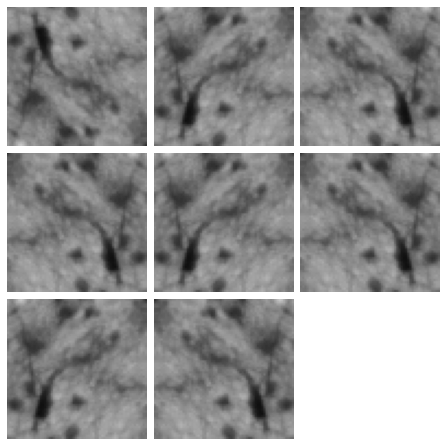

In [11]:
n_examples = 8
example_tile = Tile('B02', '0005', 123, 456, tile_size)

###

torch.manual_seed(299792458)

example_tiles = torch.stack([dataset[example_tile] for _ in range(n_examples)])

show_tiles(example_tiles, mean=mean, std=std)

### Task 2

Write a [PyTorch Sampler](https://pytorch.org/docs/stable/data.html#torch.utils.data.Sampler) to sample random training tile locations. Overwrite the `__iter__()` method such that it yields random tuples of `(brain, image, row, column, tile_size)` based on your train brains, their image shapes and the selected _tile size_. Note that you need to make sure here that the tiles stay within the boundary of each image. Overwriting the `__len__()` method sets the number of example tiles you draw per epoch.


In [5]:
from src.data import HistoSampler

In [6]:
train_brains = ['B02', 'B05', 'B07', 'B20']
sample_images = ['0000']
epoch_length = 8

###

sampler = HistoSampler(
    file=h5_path,
    tile_size=tile_size,
    epoch_length=epoch_length,
    sample_groups=train_brains,
    sample_images=sample_images
)

In [7]:
torch.manual_seed(299792458)

for l in iter(sampler):
    print(l)

Tile(brain='B20', image='0000', row=tensor([72]), column=tensor([2071]), tile_size=64)
Tile(brain='B20', image='0000', row=tensor([620]), column=tensor([137]), tile_size=64)
Tile(brain='B20', image='0000', row=tensor([812]), column=tensor([895]), tile_size=64)
Tile(brain='B20', image='0000', row=tensor([187]), column=tensor([1744]), tile_size=64)
Tile(brain='B02', image='0000', row=tensor([174]), column=tensor([522]), tile_size=64)
Tile(brain='B20', image='0000', row=tensor([196]), column=tensor([266]), tile_size=64)
Tile(brain='B07', image='0000', row=tensor([118]), column=tensor([180]), tile_size=64)
Tile(brain='B02', image='0000', row=tensor([194]), column=tensor([280]), tile_size=64)


### Task 3

Create a [PyTorch DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) object that takes the _Dataset_ and _Sampler_ as input. Use a _tile size_ of 64 and a _batch size_  of 8 to visualize a single batch.

In [8]:
from torch.utils.data import DataLoader

In [9]:
batch_size = 8

###

dataloader = DataLoader(dataset=dataset, batch_size=batch_size, sampler=sampler)

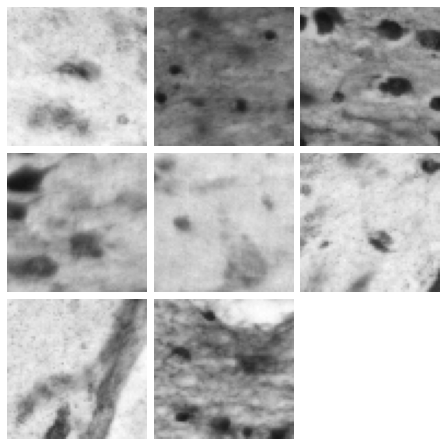

In [10]:
torch.manual_seed(299792458)

example_batch = next(iter(dataloader))

show_tiles(example_batch, mean=mean, std=std)